# A regression analysis on Advertisement Data set

In [1]:
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
Sales=df['sales'].values
Sales=Sales.reshape(200,1)

TV=df['TV'].values
TV=TV.reshape(200,1)

radio=df['radio'].values
radio=radio.reshape(200,1)

newspaper=df['newspaper'].values
newspaper=newspaper.reshape(200,1)

In [6]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

In [7]:
train_sales,test_sales=train_test_split(Sales,random_state=7)
train_TV,test_TV=train_test_split(TV,random_state=7)
train_radio,test_radio=train_test_split(radio,random_state=7)
train_newspaper,test_newspaper=train_test_split(newspaper,random_state=7)

# Fitting regression line of sales on TV advertisement budget

In [8]:
regr_TV_sales=linear_model.LinearRegression()

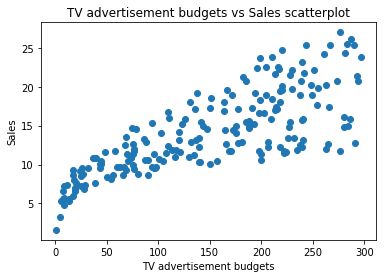

In [9]:
plt.scatter(df["TV"],df["sales"])
plt.title('TV advertisement budgets vs Sales scatterplot')
plt.xlabel('TV advertisement budgets')
plt.ylabel('Sales')
plt.show()

Figure 1.1

In [10]:
regr_TV_sales.fit(train_TV,train_sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Fitted regression line: sales=7.2198 +0.0472 TV
Mean squared error: 8.9603
The correlation coefficient between TV advertisement budgets and sales is 0.7822 .


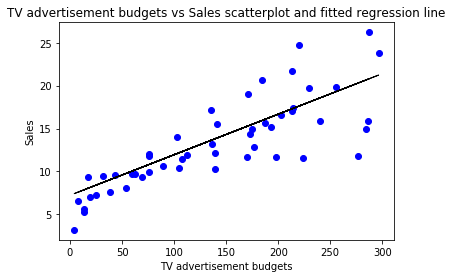

In [11]:
predicted_salesbyTV=regr_TV_sales.predict(test_TV)
predicted_salesbyTV.shape
intercept=regr_TV_sales.intercept_
slope=regr_TV_sales.coef_
#Regression equation:
print('Fitted regression line: sales=%.4f'% intercept[0],'+%.4f' %slope[0][0],'TV')
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(test_sales, predicted_salesbyTV))


#Pearson's correlation coefficent: -1 or 1 is perfect linear relationsship
p=pearsonr(TV,Sales)
correlation=p[0][0]
print("The correlation coefficient between TV advertisement budgets and sales is %.4f"% correlation,".")


# Plot outputs
plt.scatter(test_TV, test_sales,  color='blue')
plt.plot(test_TV, predicted_salesbyTV, color='black', linewidth=1)

plt.title('TV advertisement budgets vs Sales scatterplot and fitted regression line')
plt.xlabel('TV advertisement budgets')
plt.ylabel('Sales')
plt.xticks()
plt.yticks()


plt.show()

Figure 1.2

Residual Plot

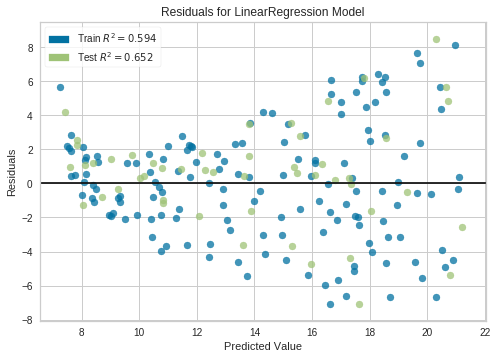

In [12]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_TV_sales, hist=False)
visualizer.fit(train_TV, train_sales)
visualizer.score(test_TV,test_sales)
visualizer.poof()

Figure 1.3

Comment: From the Figure 1.3, we observe a bit of non-random pattern, which indicates that linear regression of sales on TV advertisement budget  will not be very popular in the purpose of prediction of sales. Also the R-square values of both the train and the test data implies that the TV advertisement budgets are moderately successful in explaining the sales. Also since the correlation coefficient as given by the Pearsonian correlation coefficient is moderately high positive, 0.7822 so we may opt for prediction using linear regression.

# Fitting regression line of sales on radio advertisement budget

In [13]:
regr_radio_sales=linear_model.LinearRegression()

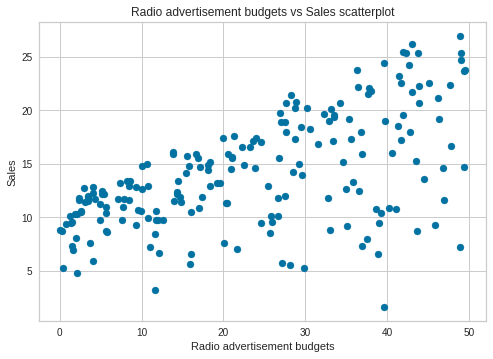

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df["radio"],df["sales"])
plt.title('Radio advertisement budgets vs Sales scatterplot')
plt.xlabel('Radio advertisement budgets')
plt.ylabel('Sales')
plt.show()

Figure 2.1

In [15]:
regr_radio_sales.fit(train_radio,train_sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Fitted regression line: sales=9.6534 +0.1910 radio
Mean squared error: 16.0384
The correlation coefficient between radio advertisement budgets and sales is 0.5762 .


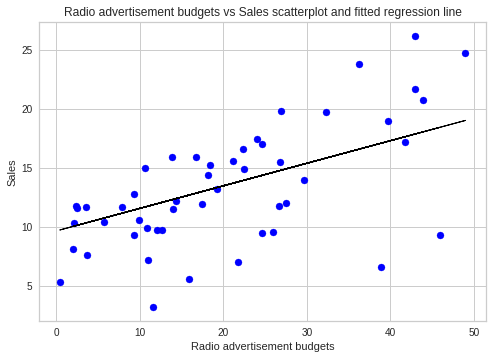

In [16]:
predicted_salesbyradio=regr_radio_sales.predict(test_radio)
intercept=regr_radio_sales.intercept_
slope=regr_radio_sales.coef_
#Regression equation:
print('Fitted regression line: sales=%.4f'% intercept[0],'+%.4f'% slope[0][0],'radio')
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(test_sales, predicted_salesbyradio))

#Pearson's correlation coefficent: -1 or 1 is perfect linear relationsship
p=pearsonr(radio,Sales)
correlation=p[0][0]
print("The correlation coefficient between radio advertisement budgets and sales is %.4f" % correlation,".")


# Plot outputs
plt.scatter(test_radio, test_sales,  color='blue')
plt.plot(test_radio, predicted_salesbyradio, color='black', linewidth=1)

plt.title('Radio advertisement budgets vs Sales scatterplot and fitted regression line')
plt.xlabel('Radio advertisement budgets')
plt.ylabel('Sales')
plt.xticks()
plt.yticks()


plt.show()

Figure 2.2

Residual Plot

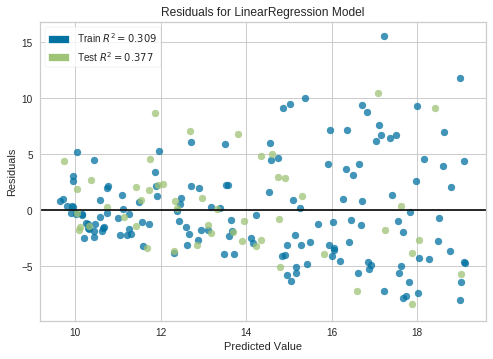

In [17]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_radio_sales, hist=False)
visualizer.fit(train_radio, train_sales)
visualizer.score(test_radio,test_sales)
visualizer.poof()

Figure 2.3

Comment: From the Figure 2.3, we can observe that the quality of fit of linear regression of sales on radio advertisement budgets is degraded compared to that in the case of TV and sales( we compare the values of R-square values).  

# Fitting regression line of sales on newspaper advertisement budget

In [18]:
regr_newspaper_sales=linear_model.LinearRegression()

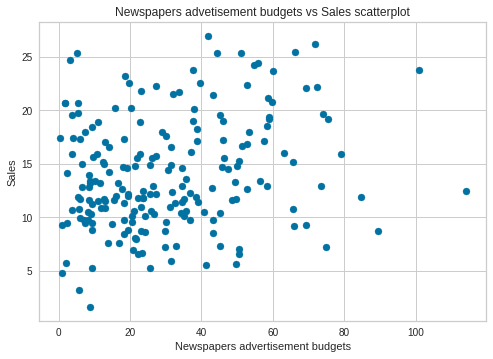

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df["newspaper"],df["sales"])
plt.title('Newspapers advetisement budgets vs Sales scatterplot')
plt.xlabel('Newspapers advertisement budgets')
plt.ylabel('Sales')
plt.show()

Figure 3.1

In [20]:
regr_newspaper_sales.fit(train_newspaper,train_sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Fitted regression line: Sales=12.5032 +0.0565 newspaper
Mean squared error: 25.5696
The correlation coefficient between newspaper advertisement budgets and sales is 0.2283  .


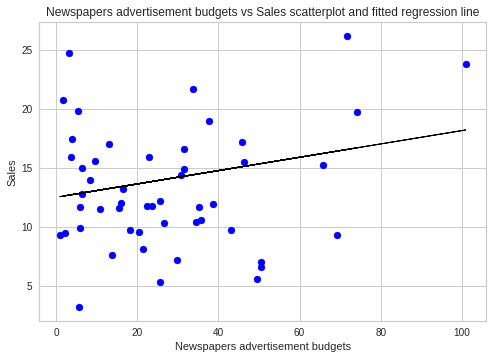

In [21]:
predicted_salesbynewspaper=regr_newspaper_sales.predict(test_newspaper)
intercept=regr_newspaper_sales.intercept_
slope=regr_newspaper_sales.coef_
#Regression equation:
print('Fitted regression line: Sales=%.4f'% intercept[0],'+%.4f'% slope[0][0],'newspaper')
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(test_sales, predicted_salesbynewspaper))


#Pearson's correlation coefficent: -1 or 1 is perfect linear relationsship
p=pearsonr(newspaper,Sales)
correlation=p[0][0]
print("The correlation coefficient between newspaper advertisement budgets and sales is %.4f "% correlation,".")

# Plot outputs
plt.scatter(test_newspaper, test_sales,  color='blue')
plt.plot(test_newspaper, predicted_salesbynewspaper, color='black', linewidth=1)

plt.title('Newspapers advertisement budgets vs Sales scatterplot and fitted regression line')
plt.xlabel('Newspapers advertisement budgets')
plt.ylabel('Sales')
plt.xticks()
plt.yticks()


plt.show()

Figure 3.2

Residual Plot

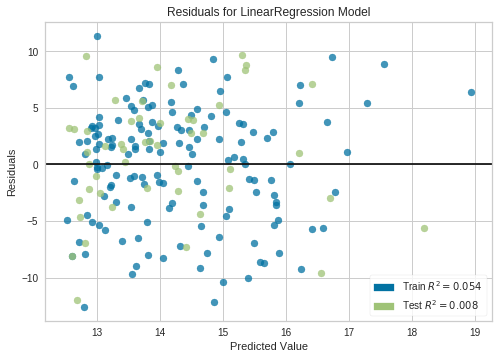

In [22]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_newspaper_sales, hist=False)
visualizer.fit(train_newspaper, train_sales)
visualizer.score(test_newspaper,test_sales)
visualizer.poof()

Figure 3.3

Comment: It is quite guessable from Figure 3.1 that a linear regression model will not be of much success, look at the clustering in the figure it is quite understandable that linear regression model will not be of much use. Furthermore from Figure 3.3 observe the R-square values for both the train and the test data are very low and supports the previous arguement.

Comment: From the above analysis we observe that the TV channel budget is the most correlated to sales, followed by that of radio and newspaper.

# Implementing Multiple Linear Regression

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Fitting multiple linear regression of sales on TV and radio advertisement budgets

In [24]:
regr_TV_radio_sales=linear_model.LinearRegression()

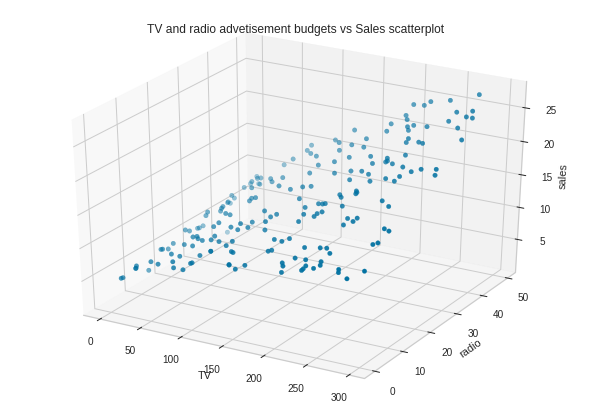

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(TV,radio,Sales)
plt.title('TV and radio advetisement budgets vs Sales scatterplot')
plt.xlabel('TV')
plt.ylabel('radio')
ax.set_zlabel('sales')
plt.show()

Figure 4.1

In [26]:
X = df[['TV','radio']]
Y = df['sales'] 
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=7)

In [27]:
regr_TV_radio_sales.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
predicted=regr_TV_radio_sales.predict(test_X)
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(test_Y, predicted))
coeff_df = pd.DataFrame(regr_TV_radio_sales.coef_, X.columns, columns=['Coefficient'])  
d=coeff_df['Coefficient']
intercept=regr_TV_radio_sales.intercept_
print("Fitted regression plane: %.4f"%intercept,"+ %.4f"%d["TV"],"TV+ %.4f"%d["radio"],"radio")

Mean squared error: 2.4627
Fitted regression plane: 2.7179 + 0.0469 TV+ 0.1879 radio


Residual Plot

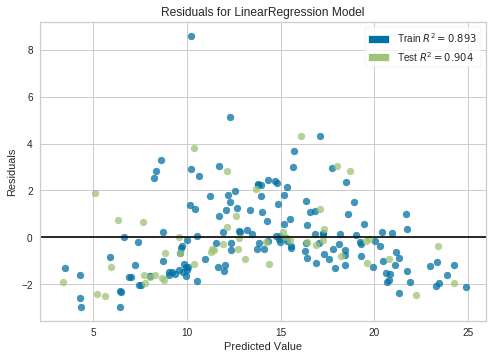

In [29]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_TV_radio_sales, hist=False)
visualizer.fit(train_X, train_Y)
visualizer.score(test_X,test_Y)
visualizer.poof()

Figure 4.2

# Fitting multiple linear regression of sales on TV and newspaper advertisement budgets

In [30]:
X = df[['TV','newspaper']]
Y = df['sales'] 
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=7)

In [31]:
regr_TV_newspaper_sales=linear_model.LinearRegression()

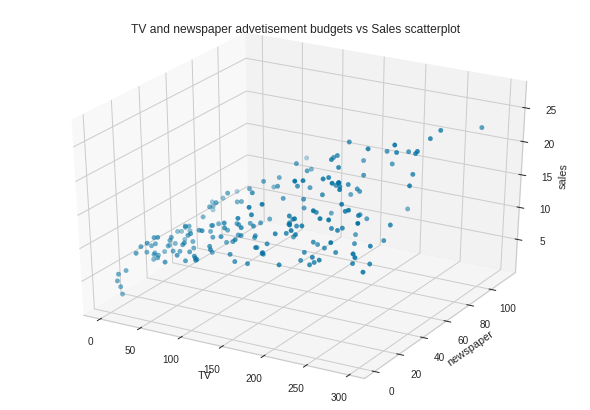

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(TV,newspaper,Sales)
plt.title('TV and newspaper advetisement budgets vs Sales scatterplot')
plt.xlabel('TV')
plt.ylabel('newspaper')
ax.set_zlabel('sales')
plt.show()

Figure 5.1

In [33]:
regr_TV_newspaper_sales.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
predicted=regr_TV_newspaper_sales.predict(test_X)
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(test_Y, predicted))
coeff_df = pd.DataFrame(regr_TV_newspaper_sales.coef_, X.columns, columns=['Coefficient'])  
d=coeff_df['Coefficient']
intercept=regr_TV_newspaper_sales.intercept_
print("Fitted regression plane: %.4f"%intercept,"+ %.4f"%d["TV"],"TV+ %.4f"%d["newspaper"],"newspaper")


Mean squared error: 8.2334
Fitted regression plane: 5.8472 + 0.0466 TV+ 0.0464 newspaper


Residual Plot

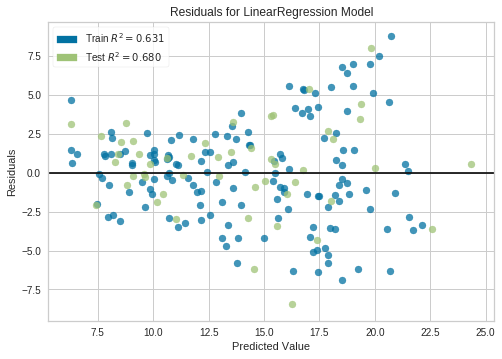

In [35]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_TV_newspaper_sales, hist=False)
visualizer.fit(train_X, train_Y)
visualizer.score(test_X,test_Y)
visualizer.poof()

Figure 5.2

# Fitting multiple linear regression of sales on radio and newspaper advertisement budgets

In [36]:
X = df[['radio','newspaper']]
Y = df['sales'] 
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=7)

In [37]:
regr_radio_newspaper_sales=linear_model.LinearRegression()

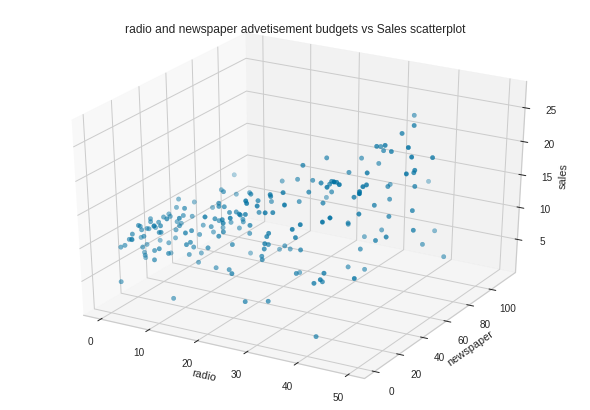

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(radio,newspaper,Sales)
plt.title('radio and newspaper advetisement budgets vs Sales scatterplot')
plt.xlabel('radio')
plt.ylabel('newspaper')
ax.set_zlabel('sales')
plt.show()

Figure 6.1

In [39]:
regr_radio_newspaper_sales.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
predicted=regr_radio_newspaper_sales.predict(test_X)
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(test_Y, predicted))
coeff_df = pd.DataFrame(regr_radio_newspaper_sales.coef_, X.columns, columns=['Coefficient'])  
d=coeff_df['Coefficient']
intercept=regr_radio_newspaper_sales.intercept_
print("Fitted regression plane: %.4f"%intercept,"+ %.4f"%d["radio"],"radio+ %.4f"%d["newspaper"],"newspaper")

Mean squared error: 16.1191
Fitted regression plane: 9.4463 + 0.1857 radio+ 0.0106 newspaper


Residual Plot

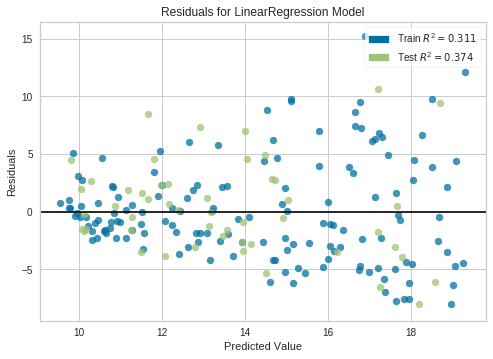

In [41]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_radio_newspaper_sales, hist=False)
visualizer.fit(train_X, train_Y)
visualizer.score(test_X,test_Y)
visualizer.poof()

Figure 6.2

Comment: From the multiple regression analysis we obeserve that the budget on TV and radio advertisement( look at Figure 4.2, displaying the highest r-square both for test and train, though there are some non-random pattern as displayed in the residual plot) explains sales the most.

# Fitting multiple linear regression of sales on TV, radio and newspaper advertisement budgets

In [42]:
regr_TV_radio_newspaper_sales=linear_model.LinearRegression()

In [43]:
X = df[['TV','radio','newspaper']]
Y = df['sales'] 
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=7)

In [44]:
regr_TV_radio_newspaper_sales.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
predicted=regr_TV_radio_newspaper_sales.predict(test_X)
# The mean squared error
print("Mean squared error: %.4f"
      % mean_squared_error(test_Y, predicted))
coeff_df = pd.DataFrame(regr_TV_radio_newspaper_sales.coef_, X.columns, columns=['Coefficient'])  
d=coeff_df['Coefficient']
intercept=regr_TV_radio_newspaper_sales.intercept_
print("Fitted regression plane: %.4f"%intercept,"+%.4f"%d["TV"],"TV+ %.4f"%d["radio"],"radio+ %.5f"%d["newspaper"],"newspaper")

Mean squared error: 2.4626
Fitted regression plane: 2.7186 +0.0469 TV+ 0.1879 radio+ -0.00004 newspaper


Residual Plot

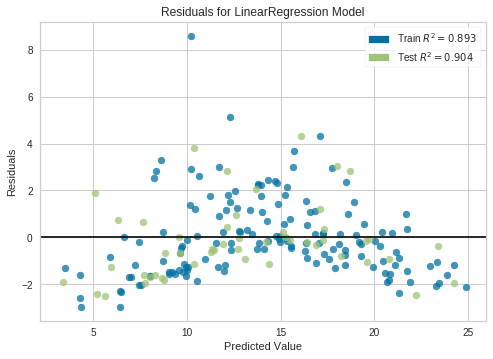

In [46]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_TV_radio_newspaper_sales, hist=False)
visualizer.fit(train_X, train_Y)
visualizer.score(test_X,test_Y)
visualizer.poof()

Figure 7

Comment: And finally the multiple linear regression of sales based on all the three advertisement channels explains sales the most. Also note that in the regression equation the coefficient of newspaper is very low indicating that the sales merely depends on the budget set on newspaper advertisement, which can also be observed from the displayed r-square values in Figure 3.3.